In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a Model class that inherits nn model

In [2]:
class Model(nn.Module):
    # input layer 4 features of the flower -->
    # hidden layer1 with number of neurons H1 -->
    # H2 (n) -->output 3 classifiers
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1) # fc means fully connected
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x

Have to create manual seed.to get same randomization

In [3]:
torch.manual_seed(41)

In [4]:
model=Model()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# inline for inline graphs

import pandas as pd


In [6]:
my_df=pd.read_csv("iris.data.csv")
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
my_df['variety'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
my_df['variety']=my_df['variety'].replace('Iris-setosa',0.0)
my_df['variety']=my_df['variety'].replace('Iris-versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Iris-virginica',2.0)

C:\Users\DASUN\AppData\Local\Temp\ipykernel_332\3072324116.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Iris-virginica',2.0)


In [9]:
# Train Test split set X y
X=my_df.drop('variety' ,axis=1)
y = my_df['variety']

#convert to numpy arrays
X=X.values
y=y.values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [11]:
#convert to float tensors
X_train=torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

set criterion of the model to mesure the error

In [12]:
criterion =nn.CrossEntropyLoss()
#choose Adam optimizer,learning rate
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

#model params are fc1 fc2 and output
 


In [13]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [14]:
#train the model.
#determine how many epchs we want
epochs=150
#if loss don't decrease over time we want to change lr
losses=[]
for i in range(epochs):
    #go forward and get a prediction
    y_pred=model.forward(X_train) 
    
    #measure loss
    loss = criterion(y_pred,y_train)
    
    #keep track of losses
    losses.append(loss.detach().numpy())
    
    #print every 10 epochs
    if i%10==0:
        print(f"Epoch: {i} and loss: {loss}")
    #Do some back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405257225037
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942363023757935
Epoch: 70 and loss: 0.12151691317558289
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972
Epoch: 100 and loss: 0.052865754812955856
Epoch: 110 and loss: 0.04508380591869354
Epoch: 120 and loss: 0.0397995188832283
Epoch: 130 and loss: 0.03597070649266243
Epoch: 140 and loss: 0.0329371802508831


Text(0.5, 0, 'epochs')

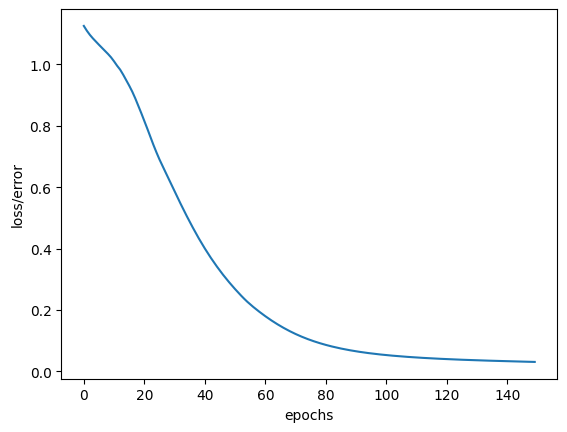

In [15]:
#graph it
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")

Evaluate model on test

In [16]:
with torch.no_grad(): #basically turn of back propagations
    y_eval=model.forward(X_test)
    loss =criterion(y_eval,y_test)
loss
    

tensor(0.1332)

In [19]:
correct=0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val=model.forward(data)
        #what type of flower
        print(f"{i+1}.) {str(y_val)} \t {y_test[i]}")
        
        #correct or not
        if y_val.argmax().item()==y_test[i]:
            correct +=1
print(f"we got correct:{correct}")

1.) tensor([-6.8604,  4.7464,  7.6692]) 	 2
2.) tensor([-8.8358,  3.6727, 12.1556]) 	 2
3.) tensor([-9.9072,  4.8788, 12.6108]) 	 2
4.) tensor([-5.0473,  7.0555,  2.0779]) 	 1
5.) tensor([-8.4233,  4.9096, 10.0999]) 	 2
6.) tensor([-3.7448,  6.2176,  0.7234]) 	 1
7.) tensor([-6.9435,  5.5172,  6.9513]) 	 2
8.) tensor([-4.9913,  7.1507,  1.8686]) 	 1
9.) tensor([-7.6676,  5.2079,  8.5077]) 	 2
10.) tensor([-9.4403,  3.8758, 12.9474]) 	 2
11.) tensor([-6.6576,  5.5452,  6.4533]) 	 2
12.) tensor([ 6.5208, -3.9182, -5.2198]) 	 0
13.) tensor([ 6.0236, -3.4996, -4.8094]) 	 0
14.) tensor([-2.2259e+00,  4.6106e+00, -3.4486e-03]) 	 1
15.) tensor([ 4.9732, -2.4099, -4.3255]) 	 0
16.) tensor([-6.3978,  5.9106,  5.6281]) 	 2
17.) tensor([ 5.7967, -3.2543, -4.7462]) 	 0
18.) tensor([-6.7901,  4.9821,  7.3040]) 	 1
19.) tensor([ 6.3231, -3.7510, -5.0594]) 	 0
20.) tensor([ 4.8864, -2.3985, -4.1618]) 	 0
21.) tensor([-2.8104,  5.2290,  0.2752]) 	 1
22.) tensor([-9.0848,  4.4888, 11.6702]) 	 2
23.) te

New Iris data

In [23]:
new_iris=torch.tensor([5.9,3.0,5.1,1.8])

with torch.no_grad():
    print(model(new_iris).argmax())

tensor(2)


# Save NN model

In [24]:
torch.save(model.state_dict(),'my_iris_model.pt') #save weights and biases

# Load Model

In [25]:
new_model=Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [26]:
new_model.eval(
)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)